Algorytm K-średnich według pseudo kodu Raport 1 oraz Raport 2

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Raport 1

In [206]:
df = pd.read_csv('probki.csv')
X = df.values
M, n_features = X.shape

In [207]:
m = 3  
iters = 10

U = np.zeros(M, dtype=int)

In [208]:
np.random.seed(1)
random_indices = np.random.choice(M, size=m, replace=False)
V = X[random_indices].copy()

In [209]:
V_4 = None
U_4 = None
V_10 = None
U_10 = None

for iteration in range(iters):
    
    for s in range(M):
        distances = []

        for j in range(m):
            dist = np.sqrt(np.sum((X[s] - V[j]) ** 2))
            distances.append(dist)
        
        U[s] = np.argmin(distances)

    for j in range(m):
        
        Xgr_indices = []
        for s in range(M):
            if U[s] == j:
                Xgr_indices.append(s)
        
        if len(Xgr_indices) == 0:
            continue
        
        Xgr = X[Xgr_indices]
        
        for i in range(n_features):
            V[j, i] = np.mean(Xgr[:, i])
    

    if iteration == 3:
        V_4 = V.copy()
        U_4 = U.copy()
    
    if iteration == 9:
        V_10 = V.copy()
        U_10 = U.copy()

In [210]:
# PO 4 ITERACJACH

for j in range(m):
    print(f"GRUPA {j+1}:")
    print(f"  Położenie środka: x1={V_4[j, 0]:.4f}, x2={V_4[j, 1]:.4f}")
    
    points = X[U_4 == j]
    print(f"  Liczba próbek: {len(points)}")
    
    if len(points) > 0:
        print(f"  x1: min={np.min(points[:, 0]):.4f}, max={np.max(points[:, 0]):.4f}")
        print(f"  x2: min={np.min(points[:, 1]):.4f}, max={np.max(points[:, 1]):.4f}")
    print()

GRUPA 1:
  Położenie środka: x1=-1.2550, x2=-0.6915
  Liczba próbek: 30
  x1: min=-1.7790, max=-0.1725
  x2: min=-1.5277, max=0.5807

GRUPA 2:
  Położenie środka: x1=-0.5158, x2=1.3325
  Liczba próbek: 29
  x1: min=-1.6673, max=0.6735
  x2: min=0.7270, max=1.9929

GRUPA 3:
  Położenie środka: x1=0.8858, x2=-0.4188
  Liczba próbek: 41
  x1: min=-0.1226, max=1.3375
  x2: min=-1.5564, max=0.8573



In [211]:
# PO 10 ITERACJACH

for j in range(m):
    print(f"GRUPA {j+1}:")
    print(f"  Położenie środka: x1={V_10[j, 0]:.4f}, x2={V_10[j, 1]:.4f}")
    
    points = X[U_10 == j]
    print(f"  Liczba próbek: {len(points)}")
    
    if len(points) > 0:
        print(f"  x1: min={np.min(points[:, 0]):.4f}, max={np.max(points[:, 0]):.4f}")
        print(f"  x2: min={np.min(points[:, 1]):.4f}, max={np.max(points[:, 1]):.4f}")
    print()

GRUPA 1:
  Położenie środka: x1=-1.1264, x2=-0.8741
  Liczba próbek: 29
  x1: min=-1.7790, max=-0.0566
  x2: min=-1.5564, max=0.2806

GRUPA 2:
  Położenie środka: x1=-0.6709, x2=1.2714
  Liczba próbek: 31
  x1: min=-1.7544, max=0.5113
  x2: min=0.4760, max=1.9929

GRUPA 3:
  Położenie środka: x1=0.9293, x2=-0.3334
  Liczba próbek: 40
  x1: min=0.1669, max=1.3375
  x2: min=-1.4508, max=0.8573



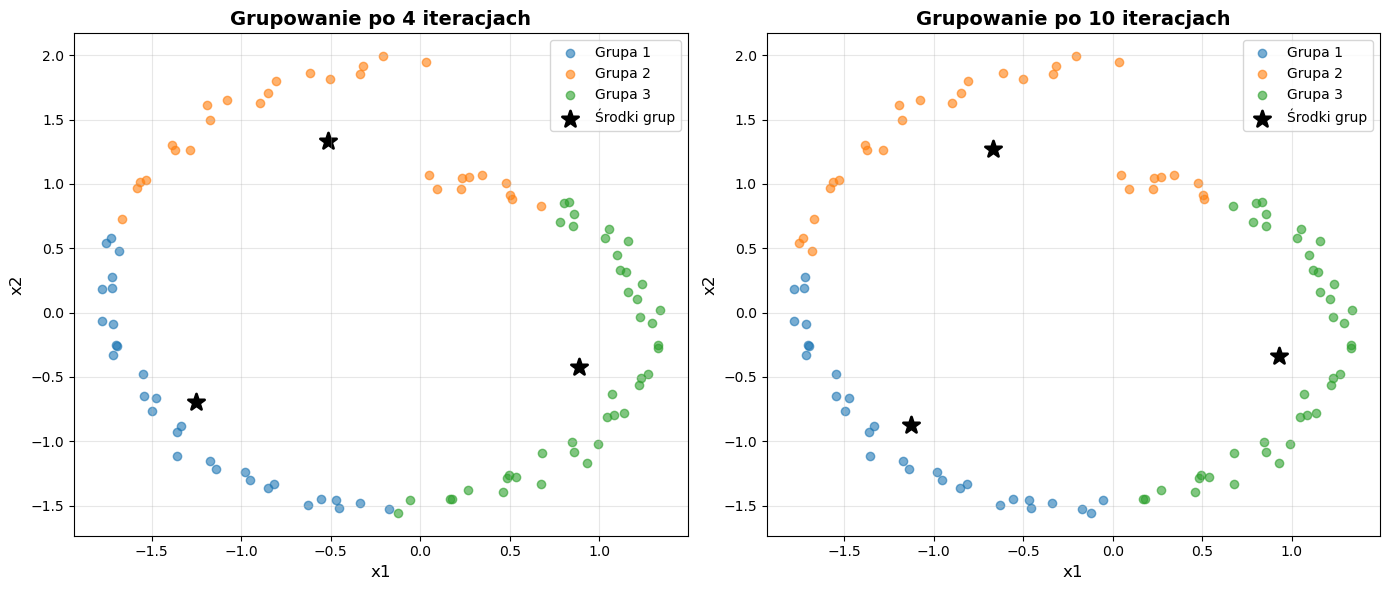

In [212]:
# Wykres po 4 iteracjach
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for j in range(m):
    points = X[U_4 == j]
    if len(points) > 0:
        ax1.scatter(points[:, 0], points[:, 1], alpha=0.6, label=f'Grupa {j+1}')

ax1.scatter(V_4[:, 0], V_4[:, 1], c='black', s=150, marker='*', linewidths=2, label='Środki grup')

ax1.set_xlabel('x1', fontsize=12)
ax1.set_ylabel('x2', fontsize=12)
ax1.set_title('Grupowanie po 4 iteracjach', fontsize=14, fontweight='bold')
ax1.grid(alpha = 0.3)
ax1.legend()

# Po 10 iteracjach
for j in range(m):
    points = X[U_10 == j]
    if len(points) > 0:
        ax2.scatter(points[:, 0], points[:, 1], alpha=0.6, label=f'Grupa {j+1}')

ax2.scatter(V_10[:, 0], V_10[:, 1], c='black', s=150, marker='*', linewidths=2, label='Środki grup')

ax2.set_xlabel('x1', fontsize=12)
ax2.set_ylabel('x2', fontsize=12)
ax2.set_title('Grupowanie po 10 iteracjach', fontsize=14, fontweight='bold')
ax2.grid(alpha= 0.3)
ax2.legend()

plt.tight_layout()
plt.show()

Raport 2

In [213]:
m = 4 
iters = 10

In [214]:
U = np.zeros(M, dtype=int)

np.random.seed(1)
random_indices = np.random.choice(M, size=m, replace=False)
V = X[random_indices].copy()

In [215]:
V_4 = None
U_4 = None
V_10 = None
U_10 = None

for iteration in range(iters):
    
    for s in range(M):
        distances = []
        for j in range(m):

            dist = np.abs(X[s, 0] - V[j, 0])
            distances.append(dist)
        
        U[s] = np.argmin(distances)

    for j in range(m):
        
        Xgr_indices = []
        for s in range(M):
            if U[s] == j:
                Xgr_indices.append(s)
        
        if len(Xgr_indices) == 0:
            continue
        
        Xgr = X[Xgr_indices]
        
        for i in range(n_features):
            V[j, i] = np.mean(Xgr[:, i])
    
    if iteration == 3:
        V_4 = V.copy()
        U_4 = U.copy()
    
    if iteration == 9:
        V_10 = V.copy()
        U_10 = U.copy()

In [216]:
for j in range(m):
    indices = np.where(U_10 == j)[0]
    cluster_size = len(indices)
    if cluster_size == 0:
        continue
    
    cluster_points = X[indices]
    x1_min, x1_max = cluster_points[:, 0].min(), cluster_points[:, 0].max()
    x2_min, x2_max = cluster_points[:, 1].min(), cluster_points[:, 1].max()
    
    print(f"Grupa {j+1}:")
    print(f"  Środek: {V_10[j]}")
    print(f"  Liczba próbek: {cluster_size}")
    print(f"  x1: min={x1_min:.2f}, max={x1_max:.2f}")
    print(f"  x2: min={x2_min:.2f}, max={x2_max:.2f}\n")

Grupa 1:
  Środek: [-1.5924625   0.08725833]
  Liczba próbek: 24
  x1: min=-1.78, max=-1.34
  x2: min=-1.11, max=1.30

Grupa 2:
  Środek: [-0.056105  0.121005]
  Liczba próbek: 20
  x1: min=-0.50, max=0.34
  x2: min=-1.56, max=1.99

Grupa 3:
  Środek: [ 0.9512825 -0.1563575]
  Liczba próbek: 40
  x1: min=0.46, max=1.34
  x2: min=-1.40, max=1.01

Grupa 4:
  Środek: [-0.93753125  0.15414375]
  Liczba próbek: 16
  x1: min=-1.29, max=-0.56
  x2: min=-1.50, max=1.86



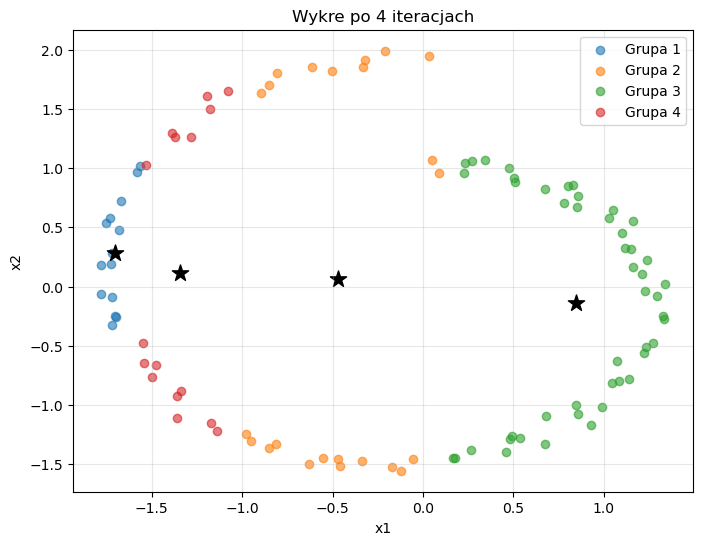

In [217]:
plt.figure(figsize=(8, 6))

for j in range(m):
    indices = np.where(U_4 == j)[0]
    cluster_points = X[indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, label=f'Grupa {j+1}')
    plt.scatter(V_4[j, 0], V_4[j, 1], color='black', marker='*', s=150)  
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Wykre po 4 iteracjach')
plt.grid(alpha=0.3)
plt.show()